📊 Episodio 500, epsilon=0.223, recompensa=-200.0
📊 Episodio 1000, epsilon=0.050, recompensa=-200.0
📊 Episodio 1500, epsilon=0.011, recompensa=-200.0
📊 Episodio 2000, epsilon=0.010, recompensa=-200.0
📊 Episodio 2500, epsilon=0.010, recompensa=-200.0
📊 Episodio 3000, epsilon=0.010, recompensa=-190.0
📊 Episodio 3500, epsilon=0.010, recompensa=-200.0
📊 Episodio 4000, epsilon=0.010, recompensa=-200.0
📊 Episodio 4500, epsilon=0.010, recompensa=-200.0
📊 Episodio 5000, epsilon=0.010, recompensa=-200.0


C:\Users\wenty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


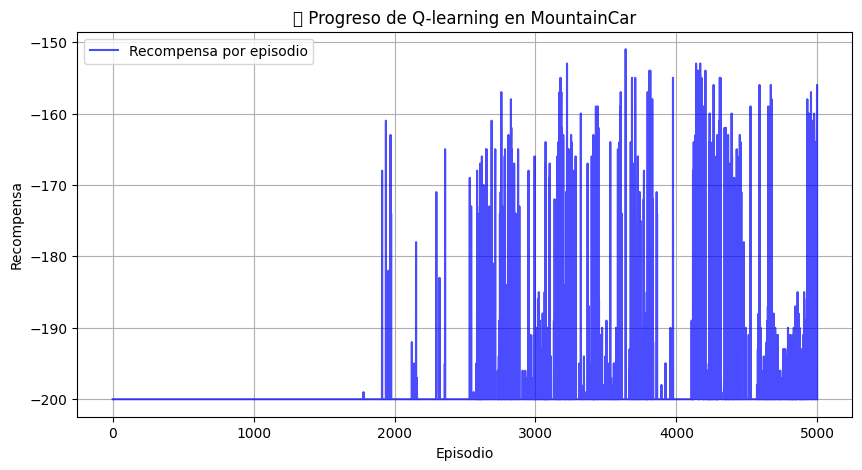

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Crear el entorno
env = gym.make("MountainCar-v0")

# Discretizar el espacio de observación
state_bins = [40, 40]  # Aumentar resolución para mejor aprendizaje
obs_low = env.observation_space.low
obs_high = env.observation_space.high
obs_bins = [np.linspace(obs_low[i], obs_high[i], state_bins[i]) for i in range(len(obs_low))]

def discretize(obs):
    return tuple(int(np.digitize(obs[i], obs_bins[i])) for i in range(len(obs)))

# Inicializar la Q-table
n_actions = env.action_space.n
q_table = np.zeros(state_bins + [n_actions])

# Hiperparámetros
alpha = 0.1         # tasa de aprendizaje
gamma = 0.99        # factor de descuento
epsilon = 1.0       # probabilidad de explorar
epsilon_decay = 0.997
min_epsilon = 0.01
episodes = 5000

# Lista para almacenar las recompensas por episodio
rewards = []

for episode in range(episodes):
    obs, _ = env.reset()
    state = discretize(obs)
    done = False
    total_reward = 0

    while not done:
        # Elegir acción: explorar o explotar
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Ejecutar acción
        next_obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_state = discretize(next_obs)

        # Actualizar Q-table
        best_next_action = np.max(q_table[next_state])
        q_table[state][action] += alpha * (reward + gamma * best_next_action - q_table[state][action])

        state = next_state
        total_reward += reward

    # Reducir epsilon
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

    # Guardar recompensa
    rewards.append(total_reward)

    # Mostrar cada 500 episodios
    if (episode + 1) % 500 == 0:
        print(f"📊 Episodio {episode+1}, epsilon={epsilon:.3f}, recompensa={total_reward}")

# Cerrar entorno
env.close()

# 📈 Graficar progreso del aprendizaje
plt.figure(figsize=(10, 5))
plt.plot(rewards, label="Recompensa por episodio", color="blue", alpha=0.7)
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.title("📊 Progreso de Q-learning en MountainCar")
plt.grid(True)
plt.legend()
plt.show()
